In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd ./drive/My\ Drive/AutonomousDriving

/content/drive/My Drive/AutonomousDriving


In [ ]:
#Clone repository for first time only
#!git clone --recursive https://github.com/swdev1202/Pseudo_Lidar_V2.git

Cloning into 'Pseudo_Lidar_V2'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 390 (delta 14), reused 22 (delta 9), pack-reused 358
Receiving objects: 100% (390/390), 2.94 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (232/232), done.


In [3]:
%cd ./Pseudo_Lidar_V2

/content/drive/My Drive/AutonomousDriving/Pseudo_Lidar_V2


In [ ]:
#To check if PyTorch is capable of using GPU, run following command
import torch
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())

True
1.6.0+cu101
10.1
7603


In [4]:
#Install require packages
!pip install configargparse==1.
!pip install tensorboardx

     |████████████████████████████████| 40kB 4.2MB/s 
  Created wheel for configargparse: filename=ConfigArgParse-1.0-cp36-none-any.whl size=17874 sha256=dda89e9889412da8f39d7c47223278c4e776e997298f91bd5613d94e6ce32333
  Stored in directory: /root/.cache/pip/wheels/0d/3a/3f/d9c3d44d4e15f125c92bd64b611106937511e20ecc34bb5229
Successfully built configargparse
     |████████████████████████████████| 317kB 8.3MB/s 


In [5]:
from src import *

Convert the KITTI velodyne ground truths to depth maps.

In [ ]:
!ls ../../Datasets/kitti/training

calib  depth_map  image_2  image_3  label_2  planes  velodyne


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_dir = '../../Datasets/kitti/training/'

In [ ]:
image_2 = 'image_2/'
images = os.listdir(dataset_dir + image_2)
#print(len([img for img in images]))

dataset = []
for img in images:
  dataset.append(img[:-4])

df = pd.DataFrame(dataset, columns=['index'], dtype=np.int32)
X_trainval, X_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
X_train, X_subval = train_test_split(X_trainval, train_size=0.75, test_size=0.25, random_state=42)
X_trainval.shape, X_train.shape, X_subval.shape, X_test.shape

In [ ]:
def write_to_file(path, data): 
  file = open(path, 'w') 
  for idx in data: 
    #print(idx)
    file.write(str(idx).zfill(6))
    file.write('\n')
    
  file.close()
  print('Done in ' + path)

In [ ]:
#write_to_file('./split/trainval.txt', X_trainval.sort_values('index')['index'])
write_to_file('./split/train.txt', X_train.sort_values('index')['index'])
write_to_file('./split/subval.txt', X_subval.sort_values('index')['index'])
#write_to_file('./split/test.txt', X_test.sort_values('index')['index'])

Done in ./split/train.txt
Done in ./split/subval.txt


In [ ]:
#Generate depth map for kitti images
!python ./src/preprocess/generate_depth_map.py \
    --data_path ../../Datasets/kitti/training/ \
    --split_file ./split/trainval.txt

Streaming output truncated to the last 5000 lines.
Finish Depth Map 002482
Finish Depth Map 002483
Finish Depth Map 002484
Finish Depth Map 002485
Finish Depth Map 002486
Finish Depth Map 002487
Finish Depth Map 002488
Finish Depth Map 002489
Finish Depth Map 002490
Finish Depth Map 002491
Finish Depth Map 002492
Finish Depth Map 002493
Finish Depth Map 002494
Finish Depth Map 002495
Finish Depth Map 002496
Finish Depth Map 002497
Finish Depth Map 002498
Finish Depth Map 002499
Finish Depth Map 002500
Finish Depth Map 002501
Finish Depth Map 002502
Finish Depth Map 002503
Finish Depth Map 002504
Finish Depth Map 002505
Finish Depth Map 002506
Finish Depth Map 002507
Finish Depth Map 002508
Finish Depth Map 002509
Finish Depth Map 002510
Finish Depth Map 002511
Finish Depth Map 002512
Finish Depth Map 002513
Finish Depth Map 002514
Finish Depth Map 002515
Finish Depth Map 002516
Finish Depth Map 002517
Finish Depth Map 002518
Finish Depth Map 002519
Finish Depth Map 002520
Finish Depth 

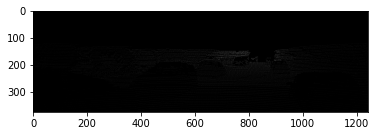

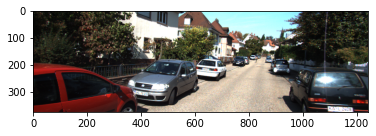

In [ ]:
depth_map_dir = dataset_dir + 'depth_map/'
img_array = np.load(depth_map_dir + '000008.npy', allow_pickle=True)
plt.imshow(img_array, cmap="gray")
plt.show()

image_2 = dataset_dir + 'image_2/' 
img = plt.imread(image_2 + '000008.png', 0)
plt.imshow(img)
plt.show()

Train SDNet on KITTI Dataset

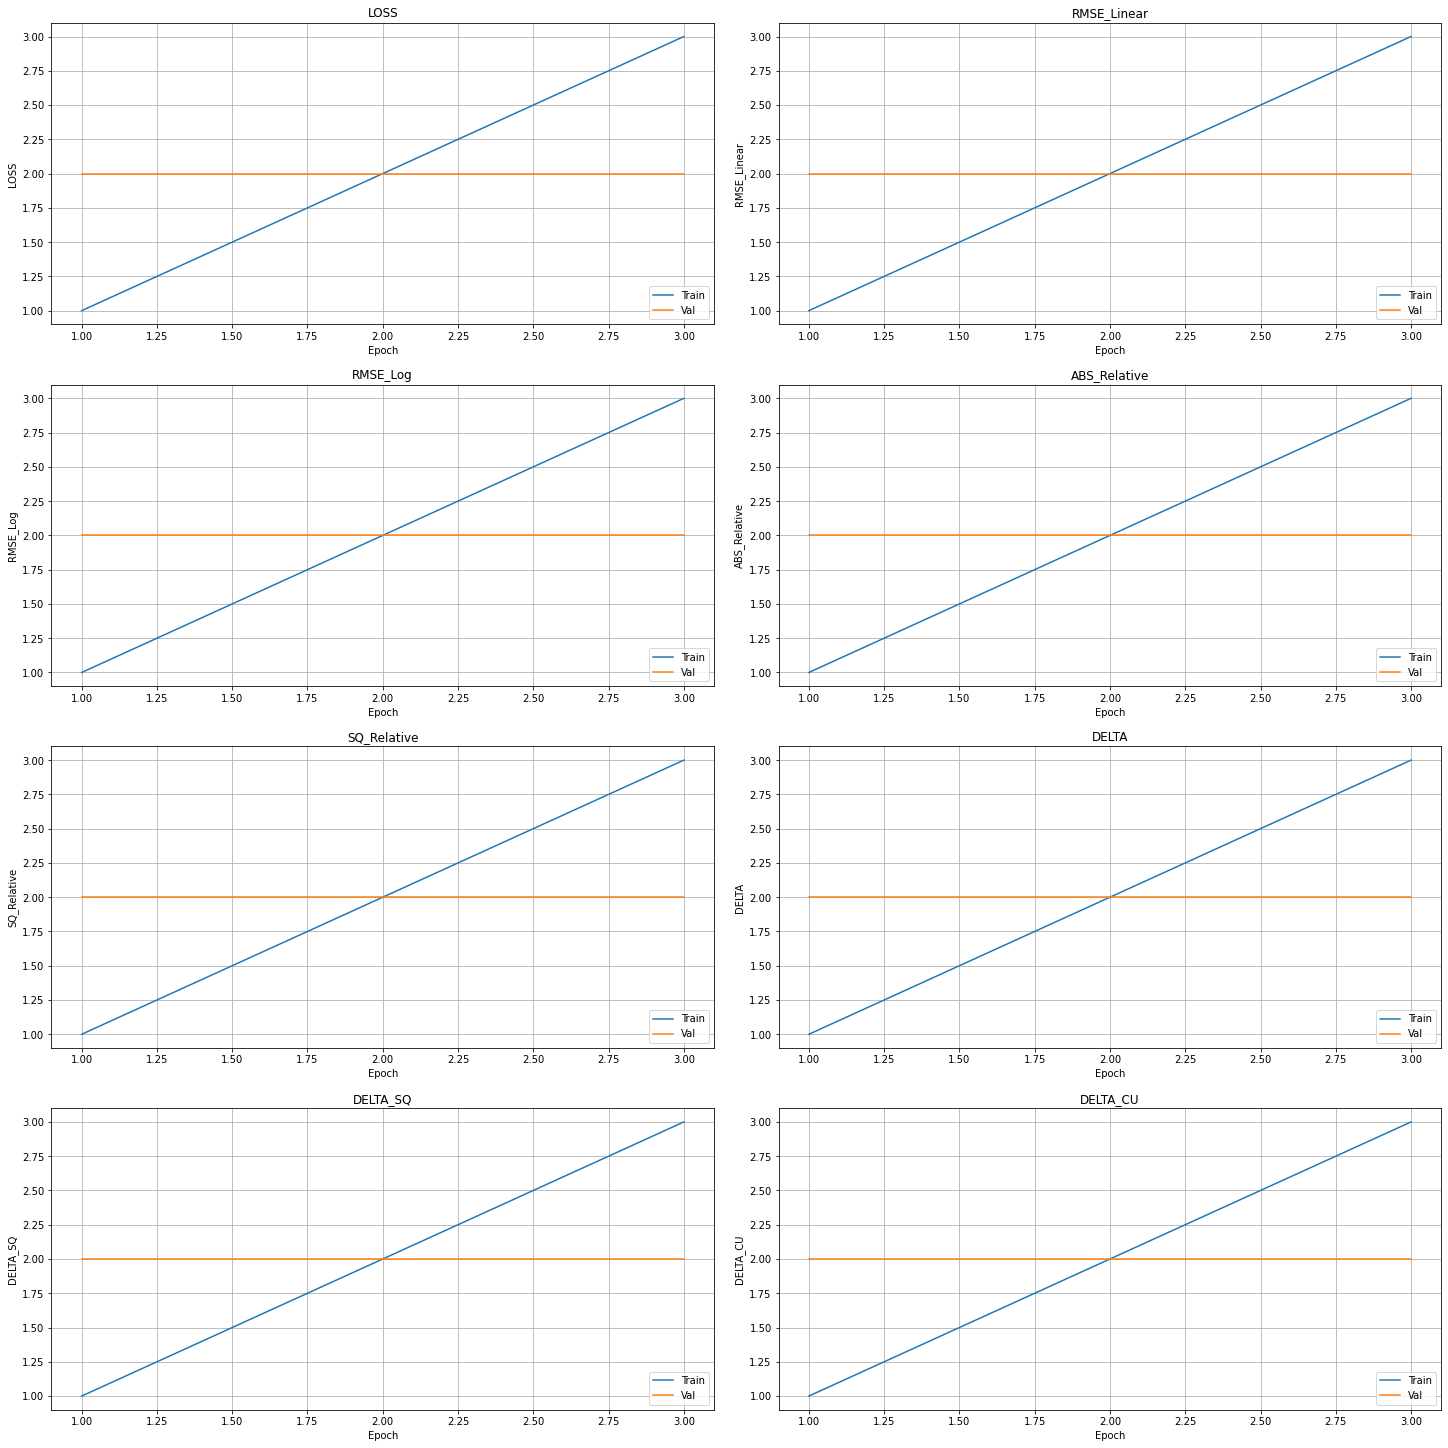

In [ ]:
#Test fig generation during train
train_metrics = []
test_metrics = []

train_metrics.append((1, 1, 1, 1, 1, 1, 1, 1, 1))
train_metrics.append((2, 2, 2, 2, 2, 2, 2, 2, 2))
train_metrics.append((3, 3, 3, 3, 3, 3, 3, 3, 3))

test_metrics.append((1, 2, 2, 2, 2, 2, 2, 2, 2))
test_metrics.append((2, 2, 2, 2, 2, 2, 2, 2, 2))
test_metrics.append((3, 2, 2, 2, 2, 2, 2, 2, 2))

def plot_trainval_metric(df_train_metric, df_test_metric):
    fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(20,20))
    columns = ['LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU']
    
    for ax, column in zip(axes.flat, columns):
      ax.plot(df_train_metric['EPOCH'], df_train_metric[column], label='Train')
      ax.plot(df_test_metric['EPOCH'], df_test_metric[column], label='Val')
      ax.set_title(column)
      ax.set_ylabel(column)
      ax.set_xlabel('Epoch')
      ax.grid(True)
      ax.legend(loc="lower right")
     
    plt.show()
    fig.savefig("trainval_metric.pdf")

df_train_metric = pd.DataFrame(train_metrics, columns=['EPOCH', 'LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU'])
df_test_metric = pd.DataFrame(test_metrics, columns=['EPOCH', 'LOSS', 'RMSE_Linear', 'RMSE_Log', 'ABS_Relative', 'SQ_Relative', 'DELTA', 'DELTA_SQ', 'DELTA_CU'])
plot_trainval_metric(df_train_metric, df_test_metric)

In [ ]:
#Train and validate SDNet on KITTI Dataset
!python ./src/main.py --config ./src/configs/sdn_kitti_train.config \
    --resume ./results/sdn_kitti_train/checkpoint.pth.tar \
    --datapath ../../Datasets/kitti/training \
    --save_path ./results/sdn_kitti_train \
    --btrain 4 --bval 1 \
    --epochs 50 --eval_interval 1

[2020-08-08 03:13:33 main.py:111] INFO     arch: SDNet
[2020-08-08 03:13:33 main.py:111] INFO     argo: False
[2020-08-08 03:13:33 main.py:111] INFO     btrain: 4
[2020-08-08 03:13:33 main.py:111] INFO     bval: 1
[2020-08-08 03:13:33 main.py:111] INFO     calib_value: 1017
[2020-08-08 03:13:33 main.py:111] INFO     checkpoint_interval: 5
[2020-08-08 03:13:33 main.py:111] INFO     config: ./src/configs/sdn_kitti_train.config
[2020-08-08 03:13:33 main.py:111] INFO     data_list: None
[2020-08-08 03:13:33 main.py:111] INFO     data_tag: None
[2020-08-08 03:13:33 main.py:111] INFO     data_type: depth
[2020-08-08 03:13:33 main.py:111] INFO     datapath: ../../Datasets/kitti/training
[2020-08-08 03:13:33 main.py:111] INFO     dataset: kitti
[2020-08-08 03:13:33 main.py:111] INFO     down: 2
[2020-08-08 03:13:33 main.py:111] INFO     dynamic_bs: False
[2020-08-08 03:13:33 main.py:111] INFO     epochs: 30
[2020-08-08 03:13:33 main.py:111] INFO     eval_interval: 1
[2020-08-08 03:13:33 main.p

Evaluation

In [ ]:
#Evaluate model
!python ./src/main.py --config ./src/configs/sdn_kitti_train.config \
    --resume ./results/sdn_kitti_train/checkpoint.pth.tar \
    --save_path ./results/sdn_kitti_trainval \
    --datapath ../../Datasets/kitti/training \
    --evaluate

[2020-08-08 06:37:23 main.py:111] INFO     arch: SDNet
[2020-08-08 06:37:23 main.py:111] INFO     argo: False
[2020-08-08 06:37:23 main.py:111] INFO     btrain: 12
[2020-08-08 06:37:23 main.py:111] INFO     bval: 4
[2020-08-08 06:37:23 main.py:111] INFO     calib_value: 1017
[2020-08-08 06:37:23 main.py:111] INFO     checkpoint_interval: 5
[2020-08-08 06:37:23 main.py:111] INFO     config: ./src/configs/sdn_kitti_train.config
[2020-08-08 06:37:23 main.py:111] INFO     data_list: None
[2020-08-08 06:37:23 main.py:111] INFO     data_tag: None
[2020-08-08 06:37:23 main.py:111] INFO     data_type: depth
[2020-08-08 06:37:23 main.py:111] INFO     datapath: ../../Datasets/kitti/training
[2020-08-08 06:37:23 main.py:111] INFO     dataset: kitti
[2020-08-08 06:37:23 main.py:111] INFO     down: 2
[2020-08-08 06:37:23 main.py:111] INFO     dynamic_bs: False
[2020-08-08 06:37:23 main.py:111] INFO     epochs: 300
[2020-08-08 06:37:23 main.py:111] INFO     eval_interval: 50
[2020-08-08 06:37:23 mai

Generate Predictions

In [9]:
#Using the model trained on KITTI training set, and generating predictions on training + validation sets
!python ./src/main.py --config ./src/configs/sdn_kitti_train.config \
    --resume ./results/sdn_kitti_train/checkpoint.pth.tar \
    --save_path ./results/sdn_kitti_trainval \
    --datapath ../../Datasets/kitti/training \
    --data_list ./split/trainval.txt --generate_depth_map --data_tag trainval

[2020-08-08 17:18:41 main.py:111] INFO     arch: SDNet
[2020-08-08 17:18:41 main.py:111] INFO     argo: False
[2020-08-08 17:18:41 main.py:111] INFO     btrain: 12
[2020-08-08 17:18:41 main.py:111] INFO     bval: 4
[2020-08-08 17:18:41 main.py:111] INFO     calib_value: 1017
[2020-08-08 17:18:41 main.py:111] INFO     checkpoint_interval: 5
[2020-08-08 17:18:41 main.py:111] INFO     config: ./src/configs/sdn_kitti_train.config
[2020-08-08 17:18:41 main.py:111] INFO     data_list: ./split/trainval.txt
[2020-08-08 17:18:41 main.py:111] INFO     data_tag: trainval
[2020-08-08 17:18:41 main.py:111] INFO     data_type: depth
[2020-08-08 17:18:41 main.py:111] INFO     datapath: ../../Datasets/kitti/training
[2020-08-08 17:18:41 main.py:111] INFO     dataset: kitti
[2020-08-08 17:18:41 main.py:111] INFO     down: 2
[2020-08-08 17:18:41 main.py:111] INFO     dynamic_bs: False
[2020-08-08 17:18:41 main.py:111] INFO     epochs: 300
[2020-08-08 17:18:41 main.py:111] INFO     eval_interval: 50
[202

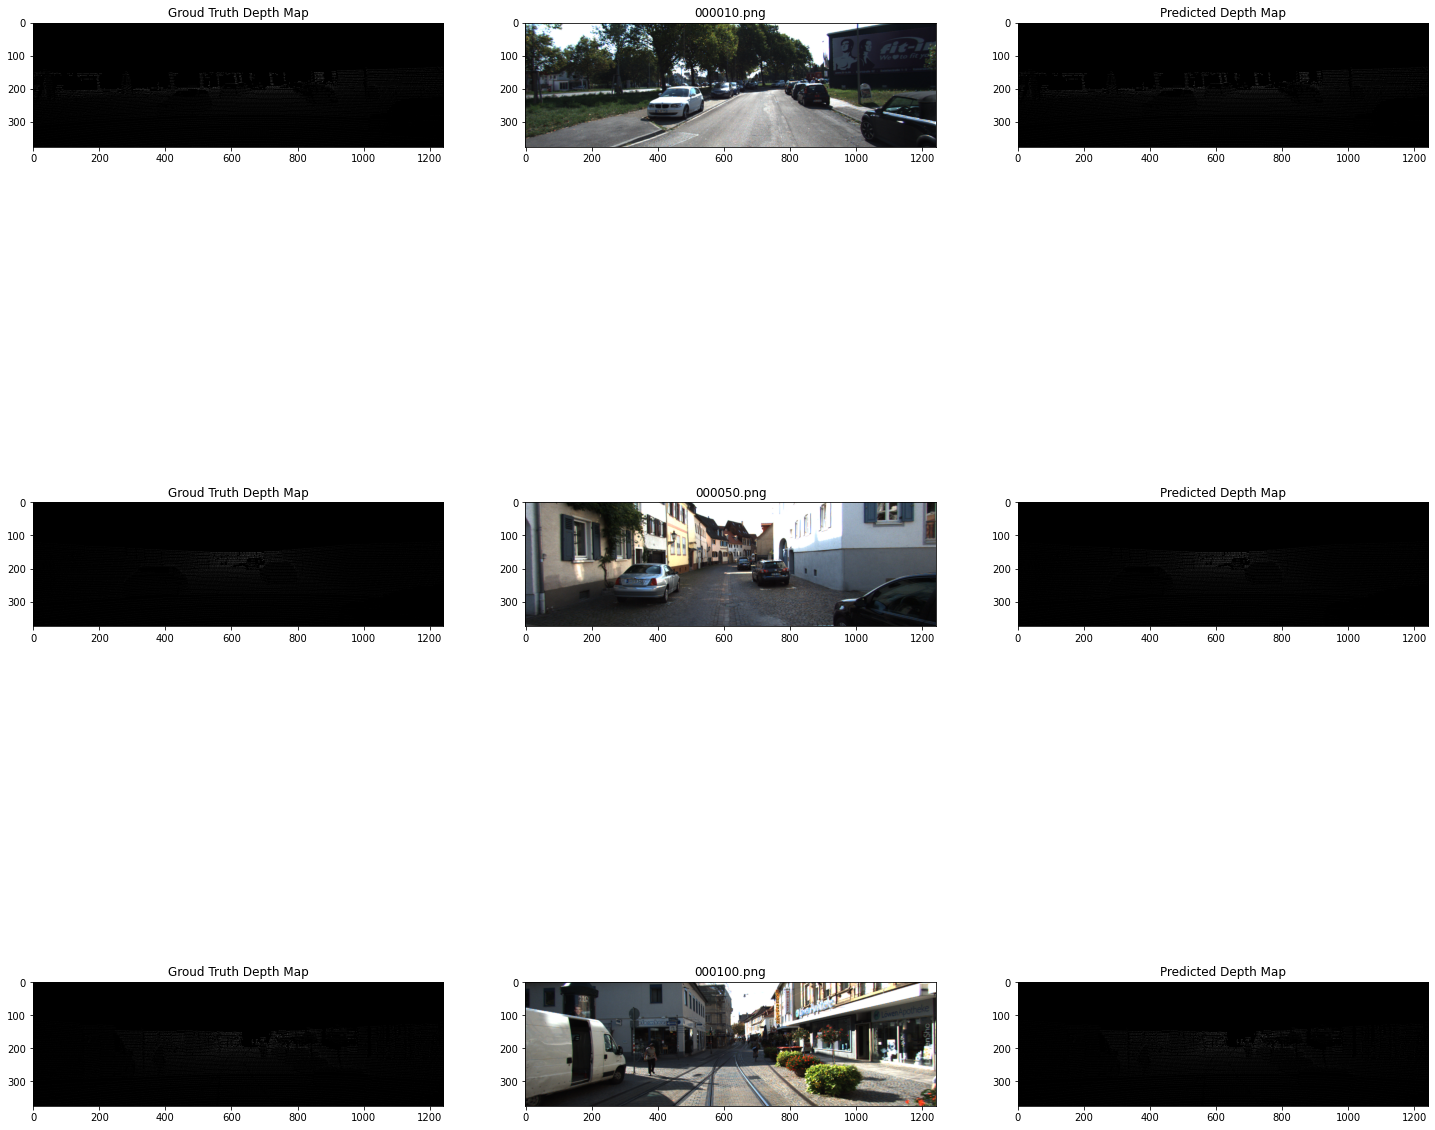

In [15]:
#Compare ground truth and predicted depth map
fig, axes = plt.subplots(3, 3, figsize=(25, 25))

i = 0
for i, j in zip(range(3), ['010', '050', '100']):
  depth_map_dir = dataset_dir + 'depth_map/'
  img_array = np.load(depth_map_dir + '000' + j + '.npy', allow_pickle=True)
  axes[i,0].imshow(img_array, cmap="gray")
  axes[i,0].set_title('Groud Truth Depth Map')

  image_2 = dataset_dir + 'image_2/' 
  img = plt.imread(image_2 + '000' + j + '.png', 0)
  axes[i,1].imshow(img)
  axes[i,1].set_title('000' + j + '.png')

  predict_depth_map_dir = './results/sdn_kitti_trainval/depth_maps/trainval/'
  predict_img_array = np.load(predict_depth_map_dir + '000' + j + '.npy', allow_pickle=True)
  axes[i,2].imshow(img_array, cmap="gray")
  axes[i,2].set_title('Predicted Depth Map')
plt.show()

fig.savefig("depth_map.pdf")

In [ ]:
#Using the model trained on KITTI training set, and generating predictions on testing sets
!python ./src/main.py --config ./src/configs/sdn_kitti_train.config \
    --resume ./results/sdn_kitti_trainval_set/checkpoint.pth.tar \
    --save_path ./results/sdn_kitti_trainval_set \
    --datapath ../../Datasets/argo-kitti/training \
    --data_list ./split/test.txt --generate_depth_map --data_tag test

Convert predictions to Pseudo-LiDAR and Planes

In [ ]:
# Convert depth maps to Pseudo-Lidar Point Clouds
!python ./src/preprocess/generate_lidar_from_depth.py \
    --calib_dir  ../../Datasets/argo-kitti/training/calib \
    --depth_dir ./results/sdn_kitti_trainval_set/depth_maps/trainval/  \
    --save_dir  ./results/sdn_kitti_trainval_set/pseudo_lidar/trainval/

In [ ]:
# Predict Ground Planes
!python ./src/preprocess/kitti_process_RANSAC.py \
    --calib_dir  ../../Datasets/argo-kitti/training/calib \
    --lidar_dir ./results/sdn_kitti_trainval_set/pseudo_lidar/trainval/ \
    --planes_dir ./results/sdn_kitti_trainval_set/pseudo_lidar/trainval_planes/